In [1]:
# Libraries
import json
import pandas as pd
import csv
import numpy as np

In [2]:
# Read go emotion tags
ge_df = pd.read_csv('./goemotions/model_tagged_strings.csv')
ge_df = ge_df.drop_duplicates(subset = ["stringID"])
print(ge_df.sort_values(by=['stringID']))

    Unnamed: 0                                             string  stringID  \
39          39          Yeah, it only got to me like straight up        257   
44          44  At number 4 South East Melbourne gets the ball...      2426   
26          26  And if not as soon as he goes inside the arc, ...      4185   
16          16  So the last thing like you both guys were surp...      4243   
10          10  Listen, he's not always born like how he was w...      5466   
69          69  I would think okay something that I did that w...      6944   
2            2  I first picked but the next two picks that rea...     11843   
5            5  Happily of haffley's probably that the wrong w...     15990   
7            7  You've also put down in summary in summary not...     16470   
22          22  We're leaving this, you know, this Palace way ...     17587   
45          45  And you did have this guy like from the Press ...     17781   
75          75      That's why I say mine is a good 

In [3]:
# Read tags file
tag_df = pd.read_csv('./tag-data/latest-50-calibration-tags.csv')
# Exclude the test user
tag_df = tag_df[tag_df.user != "test"]

print(tag_df)


     user                                             string      id  \
29   anne  So this week I'm looking at other things that ...   77880   
30   anne  Basically, it's everything you need to make a ...   63209   
31   anne  We're leaving this, you know, this Palace way ...   17587   
32   anne  And if not as soon as he goes inside the arc, ...    4185   
33   anne  Before you get into this management lock becau...  113791   
..    ...                                                ...     ...   
174   CSS  Leaving the church a and working to help these...   39658   
175   CSS  You've also put down in summary in summary not...   16470   
176   CSS  That compares to only 42 members of the Donner...   52979   
177   CSS  We're leaving this, you know, this Palace way ...   17587   
178   CSS  I need to take up the governor and I'm now a t...   81420   

     admiration   amusement   anger   annoyance   approval   caring  \
29            0           0       0           0          0      

In [4]:
# Test agreement in tags
df_sum = tag_df.groupby('id').sum()

df_sum['tag_agreement'] = df_sum.max(axis=1)
print(f'#strings with agreement of at least 2:\t{sum(df_sum["tag_agreement"] >1) }')
                                               
print(f'#strings with agreement of 3:\t{sum(df_sum["tag_agreement"] >2) }')

df_agree = df_sum[df_sum["tag_agreement"]>1]
df_agree["top_tag"] = df_agree.idxmax(axis=1)
print(df_agree.sort_values(by=['id']))

#strings with agreement of at least 2:	36
#strings with agreement of 3:	10
        admiration   amusement   anger   annoyance   approval   caring  \
id                                                                       
257              1           0       0           0          0        0   
2426             0           0       0           0          0        0   
4185             0           0       0           0          0        0   
4243             1           0       0           0          0        0   
6944             0           0       0           0          0        0   
11843            0           0       0           0          0        0   
15990            0           0       0           1          0        0   
16470            0           0       0           0          0        0   
17587            0           0       0           0          0        0   
18521            0           0       0           0          2        0   
23301            0           0       

<ipython-input-4-c456161146a2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agree["top_tag"] = df_agree.idxmax(axis=1)


In [5]:
# Compare with Go Emotion Tags
full_df = pd.merge(df_agree,ge_df,left_on="id",right_on="stringID")

df = full_df[["stringID","string","top_tag","tag1","score1"]]
print(df.sort_values("top_tag"))


    stringID                                             string  \
25     92770   I have to go you guys can go play outside right    
18     53620                              Yeah, I would say so    
15     41265                            We believe that in Dan    
1       2426  At number 4 South East Melbourne gets the ball...   
2       4185  And if not as soon as he goes inside the arc, ...   
6      15990  Happily of haffley's probably that the wrong w...   
24     91196                              Happened and day out    
23     81420  I need to take up the governor and I'm now a t...   
32    114102  I think trusting the other person having anoth...   
5      11843  I first picked but the next two picks that rea...   
10     23301  I've got like a list of them in front of me th...   
35    135340                             Is that what they say    
29    100404                             I want chicken Brandy    
21     74348  I mean, there's no magic bullet here Daryl at ..

### Tagging comparison summary
- 50 strings tagged by each of us and by go emotion
- 36 strings have at least one emotion that was tagged by at least 2 of us
- 5 of the 36 agreed on are tagged "bad-string"
- 5 of the 36 agreed on are tagged "neutral"
- 27 of the 36 were tagged as "neutral" by go emotion
- 3 tags agree between go emotion and our tagging, 2 for "gratitude" and 1 for "desire"
- 7 non-neutral tags by goEmotion was an emotion tag other than our top tag
- All strings we tagged "bad-string" or "neutral" are tagged "neutral" by go emotion.



In [28]:
#output file of strings with no agreement
df_disagree = df_sum[df_sum["tag_agreement"]<=1]
df_disagree = pd.merge(df_disagree,ge_df,left_on="id",right_on="stringID")
#pd.merge(df_disagree,full_df[["stringID","string"]],left_on="stringID",right_on="stringID",how="left")
print(df_disagree)

df_disagree.to_csv("tag-data/disagree_50_strings.csv",sep=',')



    admiration   amusement   anger   annoyance   approval   caring  \
0            0           0       0           0          0        0   
1            0           0       1           0          0        0   
2            1           0       0           0          0        0   
3            0           0       0           0          0        0   
4            0           0       0           0          1        0   
5            0           0       0           0          0        0   
6            0           0       0           0          1        0   
7            1           0       0           0          1        0   
8            0           0       0           0          0        0   
9            0           0       0           0          0        0   
10           0           0       0           0          0        1   
11           0           0       0           0          0        0   
12           1           0       0           0          0        0   
13           0      

# Do Cohen's Kappa Calculation
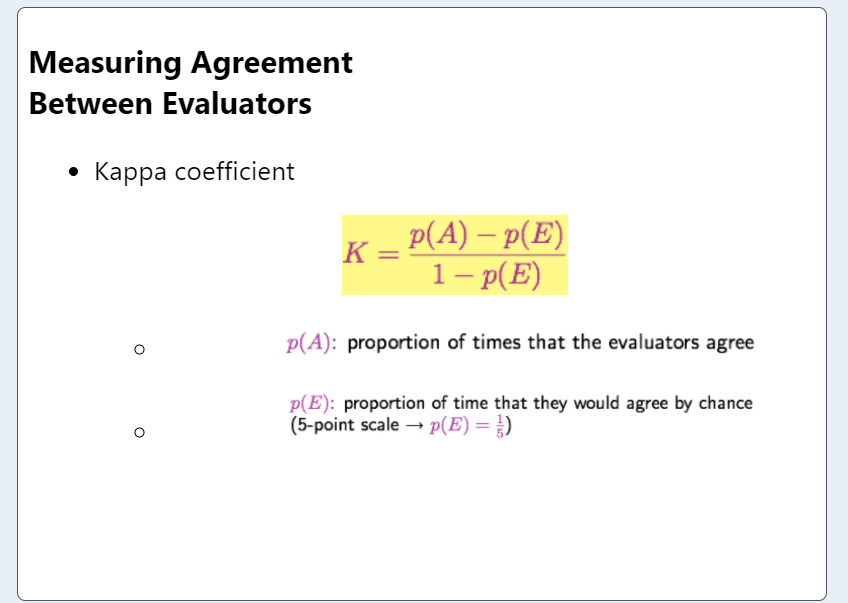